In [1]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import ptychoSampling.farfield.analysis_scripts.plot_params as params
from ptychoSampling.farfield.analysis_scripts.plot_utils import getData, PlotData
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, NullFormatter
import os
import dill
import string

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
locations = ['poisson_1e3', 'poisson_1e6']
base_paths = [f'/raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/{loc}' for loc in locations]
data_paths = [f'{p}/figures/' for p in base_paths]

In [4]:
fluences = {37.9: r'$\overline{n}_{low}$',  37900:r'$\overline{n}_{high}$'}

In [20]:
colors = ['red', 'blue', 'green', 'black', 'orange', 'magenta']
linestyles = ['--', ':', '-.']
markers = ['o', '<', 's', 'x', '*']

In [69]:
suffix1 = ['spr', 'bpr']
suffix2 = ['gaussian', 'poisson', 'poisson_surrogate']
prefix = ['lma', 'jma']
dats_all = []
for d in data_paths:
    dats_1 = []
    for pref in prefix:
        dats_2 = []
        for suf2 in suffix2:
            if pref == 'lma': 
                suf1 = 'spr'
            else: 
                suf1 = 'bpr'
            fname = f'{d}/{pref}_cg_tol_check_{suf1}_{suf2}.pkl'
            with open(fname, 'rb') as f:
                dats_2.append(dill.load(f))
        dats_1.append(dats_2)
    dats_all.append(dats_1)
                

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

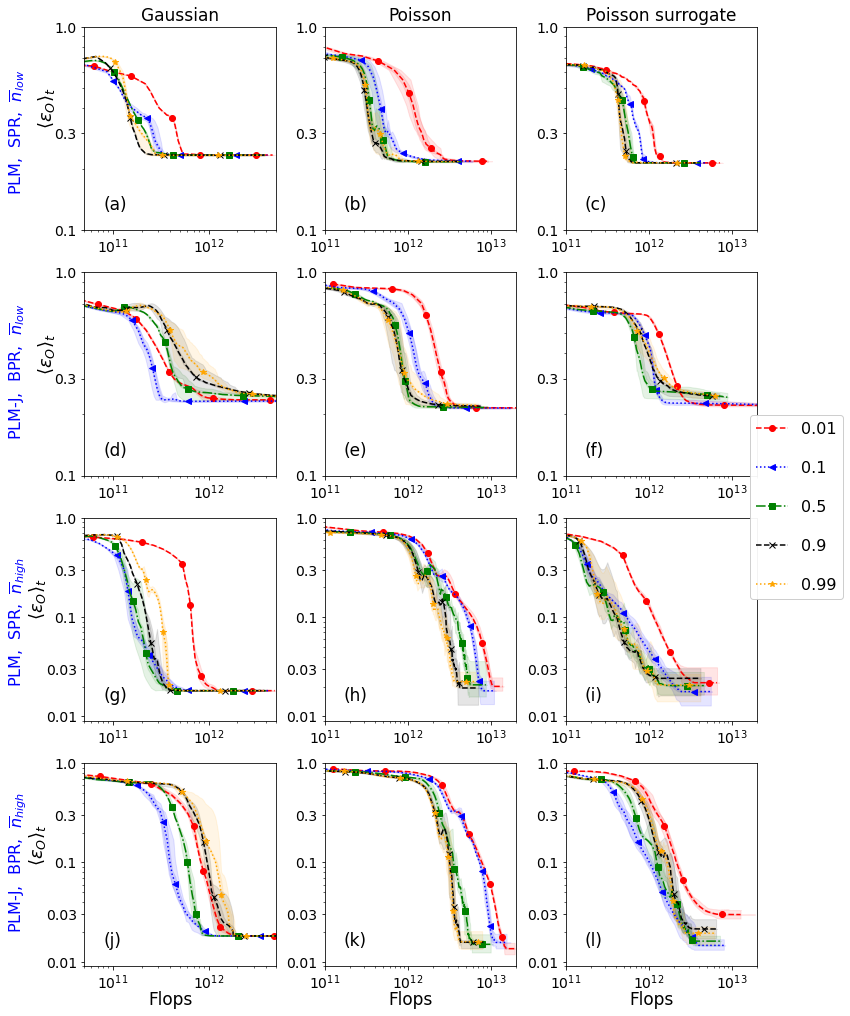

In [108]:
fig, axes = plt.subplots(4, 3, figsize=[3 * 3.5, 4 * 3.5], constrained_layout=True)
for i1, (fnum, flabel) in enumerate(fluences.items()):
    for i2, d1 in enumerate(dats_all[i1]):
        ir = i1 * 2 + i2
        for i3, d2 in enumerate(d1):
            for i4, (x, y) in enumerate(d2.xys):
                color = colors[i4 % len(colors)]
                ls = linestyles[i4 % len(linestyles)]
                marker = markers[i4 % len(markers)]
                
               
                axes[ir, i3].plot(x, y, markevery=0.2, color=color, ls=ls, marker=marker, label=d2.labels[i4])
                axes[ir, i3].fill_between(x, d2.lows[i4][:x.size], d2.highs[i4][:x.size], color=color, alpha=0.1)
                axes[ir, i3].fill_betweenx(y, d2.x_lows[i4][:x.size], d2.x_highs[i4][:x.size], color=color, alpha=0.1)
                
        #if d.yscale != '':
        #    axes[ir, i2].set_yscale(d.yscale)
            if d2.xscale != '':
                axes[ir, i3].set_xscale(d2.xscale)
            
        #axes[ir, i2].set_ylim(d.ylim)
        #axes[ir, i2].set_yticks(d.yticks, minor=False)
        
            axes[ir,i3].set_yscale('log')
            axes[ir, i3].yaxis.set_major_formatter(ScalarFormatter())
            axes[ir, i3].yaxis.set_minor_formatter(NullFormatter())
            if i1 == 0:
                axes[ir, i3].set_yticks([0.1, 0.3, 1.0], minor=False)
                axes[ir, i3].set_yticklabels([0.1, 0.3, 1.0])
                axes[ir, i3].set_ylim([0.1, 1.0])
            else: 
                axes[ir, i3].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
                axes[ir, i3].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
                axes[ir, i3].set_ylim([0.009, 1.0])
            
            
            if i1 == 0:
                if i3 == 0:
                    axes[ir, i3].set_xticks([1e11, 1e12], minor=False)
                    axes[ir, i3].set_xlim(5e10, 5e12)
                else:
                    axes[ir, i3].set_xticks([1e11, 1e12, 1e13], minor=False)
                    axes[ir, i3].set_xlim(1e11, 2e13)
            else:
                if i3 == 0:
                    axes[ir, i3].set_xticks([1e11, 1e12], minor=False)
                    axes[ir, i3].set_xlim(5e10, 5e12)
                else:
                    axes[ir, i3].set_xticks([1e11, 1e12, 1e13], minor=False)
                    axes[ir, i3].set_xlim(1e11, 2e13)
                
                
            #axes[ir, i2].set_yticks([])



            #axes[ir, i2].tick_params(axis='x', labelrotation=-15)
            axes[ir, i3].tick_params(which='both', labelsize=14)

            #legend = axes[ir, i2].legend(loc='best', fontsize=13, ncol=3)
            #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
            if axes[ir, i3].is_first_col():
                annotate = 'PLM,  SPR' if i2 == 0 else 'PLM-J,  BPR'
                annotate += f',  {flabel}'
                #fluence_str = f'{flabel} = {fnum}'
                axes[ir, i3].annotate(annotate, xy=(-0.4, 0.2), xycoords='axes fraction',
                                   fontsize=16, color='blue', rotation=90)  
                axes[ir, i3].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18, labelpad=-2, y=0.6)
            if axes[ir, i3].is_last_row():
                axes[ir, i3].set_xlabel('Flops', fontsize=17)
                axes[ir, i3].xaxis.set_label_coords(0.45,-0.12)
                
            axes[ir, i3].text(0.1, 0.1, '(' + string.ascii_lowercase[ir * 3 + i3] + ')', transform=axes[ir, i3].transAxes, 
                        size=17)
    
        #axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 2] + ')', transform=axes[i, 2].transAxes, 
        #                    size=17)
        #axes[i, 3].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 3] + ')', transform=axes[i, 3].transAxes, 
        #                    size=17)
        
axes[0,0].set_title('Gaussian', fontsize=17)
axes[0,1].set_title('Poisson', fontsize=17)
axes[0, 2].set_title('Poisson surrogate', fontsize=17)
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(1.12, 0.6),  ncol=1, fontsize=16, labelspacing=1.5, columnspacing=0.5, framealpha=0.95)
plt.savefig('lm_cg_tols.png', bbox_inches='tight')
plt.savefig('lm_cg_tols.pdf', bbox_inches='tight')